# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy
import seaborn as sns

# 1. Data Collection

In [2]:
df=pd.read_csv('Telco-Customer-Churn.csv')


# 2. Data Preprocessing

##  1. Initial Data Inspection (Mini EDA)

In [3]:

# Basic structure
print(df.shape)
print(df.info())
print(df.describe())
print(df.head())
print(df.columns)


(7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.shape

(7043, 21)

In [8]:
df.ndim

2

In [9]:
df.size

147903

In [10]:
df.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [11]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


 ## 2. Basic Data Cleaning

### Fix Data Types

In [12]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'], errors='coerce')


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
df.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

In [15]:
df['TotalCharges'].isnull().sum()

11

### Handling Misssing Values

In [16]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
df['TotalCharges'] = imputer.fit_transform(df[['TotalCharges']])

In [17]:
df.shape

(7043, 21)

### Handling Duplicates

In [18]:
df.drop_duplicates(inplace=True)

In [19]:
df.shape

(7043, 21)

In [20]:
df.columns = df.columns.str.strip().str.replace(' ', '_')


### Standardize column names

In [21]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## Full EDA 

#### Univariate Analysis

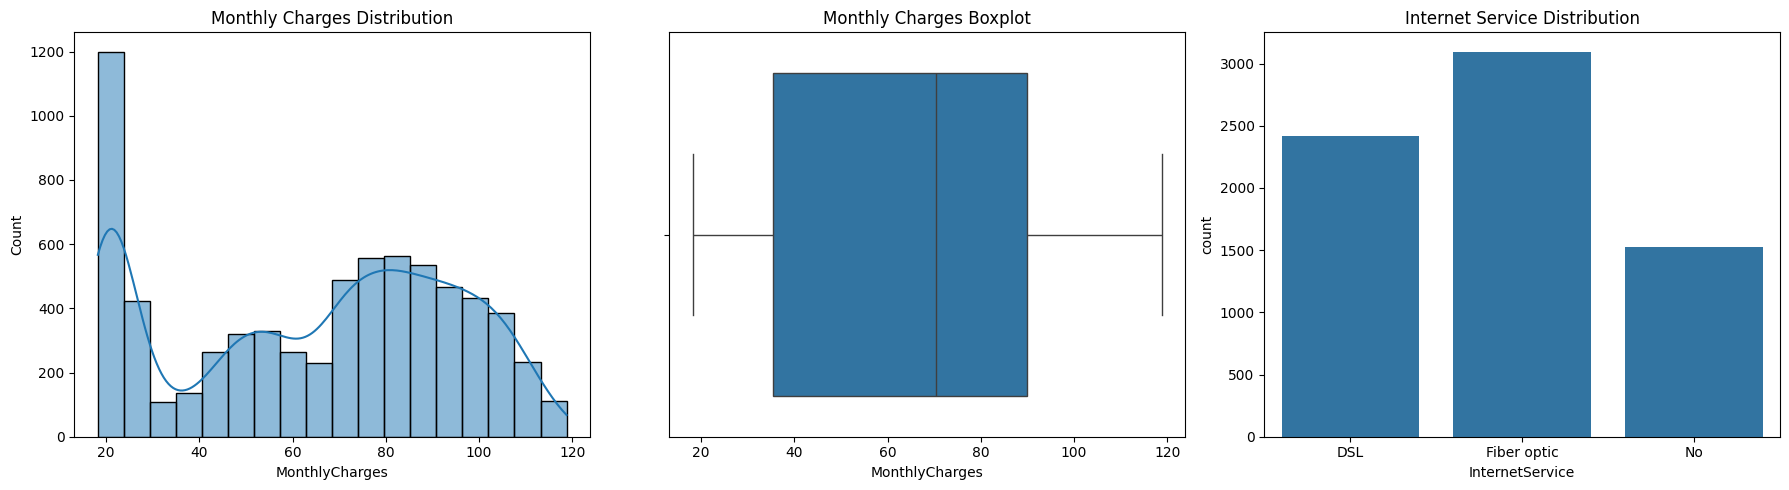

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size and layout
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 columns

# Plot 1: Histogram with KDE
sns.histplot(df['MonthlyCharges'], kde=True, ax=axes[0])
axes[0].set_title('Monthly Charges Distribution')

# Plot 2: Boxplot
sns.boxplot(x=df['MonthlyCharges'], ax=axes[1])
axes[1].set_title('Monthly Charges Boxplot')

# Plot 3: Countplot for Categorical Feature
sns.countplot(x='InternetService', data=df, ax=axes[2])
axes[2].set_title('Internet Service Distribution')

# Show all plots
plt.tight_layout()
plt.show()


In [23]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

#### BiVariate

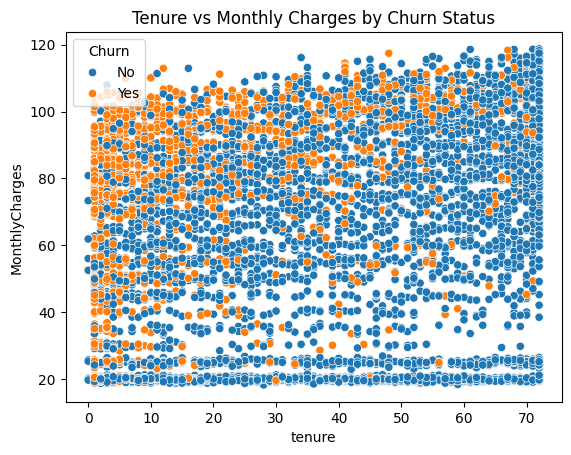

In [24]:
sns.scatterplot(data= df,x='tenure', y='MonthlyCharges', hue='Churn')
plt.title('Tenure vs Monthly Charges by Churn Status')
plt.show()

In [25]:
### Interpretation:
- This scatterplot reveals how customer tenure and charges relate to churn.
- Clusters or patterns may suggest feature interactions worth modeling.

SyntaxError: invalid syntax (3150952026.py, line 2)

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()


In [ ]:
sns.violinplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges Distribution by Churn')
plt.show()


## Feature Engineering & Transformation

In [ ]:
# Split categorical and numerical
categorical = df.select_dtypes(include='object').columns
numerical = df.select_dtypes(include=['int64', 'float64']).columns


In [31]:
df.info()
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ChurnFlag,AvgMonthlySpend
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043.000000,7043.000000,7043,7043.000000,7043.000000
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,2,4,NaN,NaN,2,NaN,NaN
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No,NaN,NaN
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,2810,2785,3875,4171,2365,NaN,NaN,5174,NaN,NaN
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,64.761692,2281.916928,NaN,0.265370,61.173413
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,30.090047,2265.270398,NaN,0.441561,61.019723
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,NaN,0.000000,9.183333
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,35.500000,402.225000,NaN,0.000000,26.274411
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,70.350000,1397.475000,NaN,0.000000,61.150000
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,89.850000,3786.600000,NaN,1.000000,84.940047


In [32]:
df['ChurnFlag'] = df['Churn'].map({'Yes': 1, 'No': 0})


In [33]:
correlations = df.corr(numeric_only=True)['ChurnFlag'].sort_values(ascending=False)
print(correlations)


ChurnFlag          1.000000
MonthlyCharges     0.193356
SeniorCitizen      0.150889
AvgMonthlySpend    0.014873
TotalCharges      -0.199037
tenure            -0.352229
Name: ChurnFlag, dtype: float64


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# Define features and target
X = df_encoded.drop(['customerID', 'Churn', 'ChurnFlag'], axis=1)
y = df_encoded['ChurnFlag']

# Train model
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Feature importance
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importances.head(10))


TotalCharges       0.159711
MonthlyCharges     0.145912
AvgMonthlySpend    0.140757
tenure             0.127726
Contract           0.076852
PaymentMethod      0.045370
TechSupport        0.044992
OnlineSecurity     0.039344
OnlineBackup       0.024864
InternetService    0.024775
dtype: float64


In [35]:
#AvgMonthlySpend
df['AvgMonthlySpend'] = df['TotalCharges'] / (df['tenure'] + 1)

In [36]:
#high spender flag
df['HighSpenderFlag'] = (df['MonthlyCharges'] > df['MonthlyCharges'].median()).astype(int)

In [37]:
#TenureGroup: Bin tenure into categories
df['TenureGroup'] = pd.cut(df['tenure'], bins=[0, 12, 24, 48, 72], labels=['0–12', '13–24', '25–48', '49–72'])

In [38]:
#IsNewCustomer: Flag for customers with tenure < 6 months
df['IsNewCustomer'] = (df['tenure'] < 6).astype(int)

In [39]:
df['IsAutoPay'] = df['PaymentMethod'].str.contains('automatic', case=False).astype(int)


## Transformation

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_cols = ['MonthlyCharges', 'TotalCharges', 'AvgMonthlySpend', 'tenure']
df[scaled_cols] = scaler.fit_transform(df[scaled_cols])

In [41]:
df_encoded = pd.get_dummies(df, columns=['TenureGroup'], drop_first=True)


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   object  
 2   SeniorCitizen     7043 non-null   int64   
 3   Partner           7043 non-null   object  
 4   Dependents        7043 non-null   object  
 5   tenure            7043 non-null   float64 
 6   PhoneService      7043 non-null   object  
 7   MultipleLines     7043 non-null   object  
 8   InternetService   7043 non-null   object  
 9   OnlineSecurity    7043 non-null   object  
 10  OnlineBackup      7043 non-null   object  
 11  DeviceProtection  7043 non-null   object  
 12  TechSupport       7043 non-null   object  
 13  StreamingTV       7043 non-null   object  
 14  StreamingMovies   7043 non-null   object  
 15  Contract          7043 non-null   object  
 16  PaperlessBilling  7043 n

In [43]:
drop_cols = [
    'customerID', 'Churn', 'gender', 'PhoneService', 'PaperlessBilling',
    'TenureGroup', 'StreamingTV', 'StreamingMovies', 'DeviceProtection'
]
df_cleaned = df.drop(columns=drop_cols)


In [44]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df_cleaned.copy()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])


In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded.drop('ChurnFlag', axis=1))


In [46]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)  # retain 95% variance
X_pca = pca.fit_transform(X_scaled)

print(f"Selected {pca.n_components_} components")


Selected 13 components


In [47]:
y=df_encoded['ChurnFlag']

## Train Predictive Models

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [49]:
# Split PCA-transformed data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [50]:
# Train model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [55]:
# Evaluate
y_pred = rf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[929 107]
 [205 168]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1036
           1       0.61      0.45      0.52       373

    accuracy                           0.78      1409
   macro avg       0.72      0.67      0.69      1409
weighted avg       0.76      0.78      0.77      1409



/home/rakshitha/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


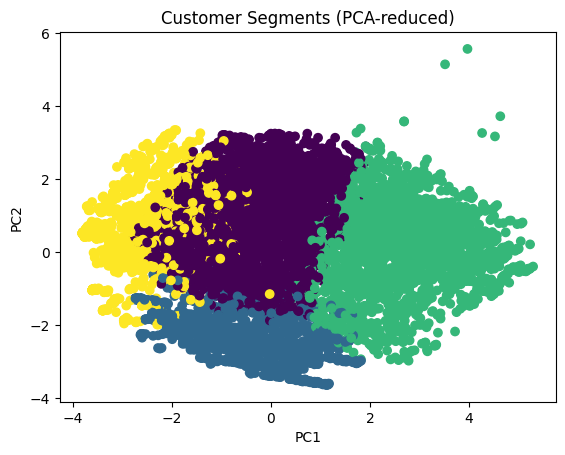

In [56]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Fit KMeans on PCA data
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Visualize clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title("Customer Segments (PCA-reduced)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


In [57]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [58]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[932 104]
 [160 213]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1036
           1       0.67      0.57      0.62       373

    accuracy                           0.81      1409
   macro avg       0.76      0.74      0.75      1409
weighted avg       0.81      0.81      0.81      1409



In [59]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

In [60]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[939  97]
 [187 186]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.50      0.57       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409



In [61]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, X_pca, y, cv=5, scoring='roc_auc')
print(f"Mean ROC-AUC: {scores.mean():.3f}")


Mean ROC-AUC: 0.800


In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define base model
rf = RandomForestClassifier(random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',  # Use ROC-AUC for churn prediction
    n_jobs=-1,
    verbose=1
)

# Fit on training data
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best ROC-AUC Score:", grid_search.best_score_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best ROC-AUC Score: 0.8246654209625845


In [63]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Pipeline: scaling + model
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(probability=True))
])

# Hyperparameter grid
param_grid = {
    'svm__C': [0.1, 1, 10],
    'svm__kernel': ['linear', 'rbf'],
    'svm__gamma': ['scale', 'auto']
}

# Grid search setup
grid_search_svm = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    verbose=1,
    n_jobs=-1
)

grid_search_svm.fit(X_train, y_train)

print("Best SVM Params:", grid_search_svm.best_params_)
print("Best ROC-AUC:", grid_search_svm.best_score_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best SVM Params: {'svm__C': 10, 'svm__gamma': 'scale', 'svm__kernel': 'linear'}
Best ROC-AUC: 0.8294155890912176
